<a href="https://colab.research.google.com/github/Towshin05/Codesoft_Internship/blob/master/customerChurn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!kaggle datasets download -d shantanudhakadd/bank-customer-churn-prediction

Dataset URL: https://www.kaggle.com/datasets/shantanudhakadd/bank-customer-churn-prediction
License(s): other
  0% 0.00/262k [00:00<?, ?B/s]
100% 262k/262k [00:00<00:00, 54.8MB/s]


In [2]:
import zipfile
zip_ref=zipfile.ZipFile('/content/bank-customer-churn-prediction.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [4]:
train_df=pd.read_csv('/content/Churn_Modelling.csv')
train_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
train_df.shape

(10000, 14)

In [ ]:
train_df['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [6]:
train_df = pd.get_dummies(train_df, columns=['Geography', 'Gender'], drop_first=True)

In [7]:
train_df

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,1,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,2,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,3,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,4,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,5,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,39,5,0.00,2,1,0,96270.64,0,False,False,True
9996,9997,15569892,Johnstone,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,9998,15584532,Liu,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,9999,15682355,Sabbatini,772,42,3,75075.31,2,1,0,92888.52,1,True,False,True


In [8]:
X=train_df.drop(['RowNumber','CustomerId','Surname','Exited'],axis=1)
y=train_df['Exited']

In [ ]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,True,False,True


In [ ]:
y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
y_train

,Exited
9069,1
2603,0
7738,0
1579,0
5058,0
...,...
5734,0
5191,0
5390,1
860,1


In [11]:
y_train=y_train.to_numpy()
y_test=y_test.to_numpy()

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler=StandardScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)


In [ ]:
y_train

array([1, 0, 0, ..., 1, 1, 0])

In [ ]:
X_train_scaled.shape

(7000, 11)

In [ ]:
X_train_scaled

array([[-0.34459497, -0.65674999, -0.34217046, ..., -0.57559072,
         1.73073215, -1.09823226],
       [-0.09518109, -0.46637979,  0.69816249, ...,  1.73734559,
        -0.57779016, -1.09823226],
       [-0.94734518, -0.56156489,  0.35138484, ..., -0.57559072,
        -0.57779016,  0.91055421],
       ...,
       [ 0.86090545, -0.08563939, -1.38250341, ..., -0.57559072,
        -0.57779016, -1.09823226],
       [ 0.15423279,  0.39028611,  1.04494014, ..., -0.57559072,
        -0.57779016,  0.91055421],
       [ 0.46600014,  1.1517669 , -1.38250341, ...,  1.73734559,
        -0.57779016,  0.91055421]])

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import  l2
from tensorflow.keras.optimizers import Adam

In [15]:
import tensorflow as tf
tf.keras.backend.clear_session()

model=Sequential()
model.add(Dense(64,activation='relu',input_dim=11 ,kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())

model.add(Dense(32,activation='relu',kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())

model.add(Dense(16,activation='relu',kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))



In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,841 (15.00 KB)

 Trainable params: 3,617 (14.13 KB)

 Non-trainable params: 224 (896.00 B)

In [17]:
callback=EarlyStopping(monitor='val_loss',patience=3,
                       verbose=1,
                       restore_best_weights=True,
                       mode='min',
                       baseline=None,

                      )

In [18]:
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])

In [19]:
history=model.fit(X_train_scaled,y_train,epochs=300,validation_split=0.3,callbacks=[callback])

Epoch 1/300
154/154 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5830 - loss: 1.5685 - val_accuracy: 0.8224 - val_loss: 1.1578
Epoch 2/300
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7693 - loss: 1.1239 - val_accuracy: 0.8438 - val_loss: 0.9214
Epoch 3/300
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8170 - loss: 0.9235 - val_accuracy: 0.8481 - val_loss: 0.7850
Epoch 4/300
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8387 - loss: 0.7747 - val_accuracy: 0.8471 - val_loss: 0.6879
Epoch 5/300
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8368 - loss: 0.6905 - val_accuracy: 0.8419 - val_loss: 0.6287
Epoch 6/300
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8420 - loss: 0.6219 - val_accuracy: 0.8529 - val_loss: 0.5732
Epoch 7/300
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8450 - loss: 0.5676 - val_accuracy: 0.8519 - val_loss: 0.5340
Epoch 8/300
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8512 - loss: 0.5287 - val_accu

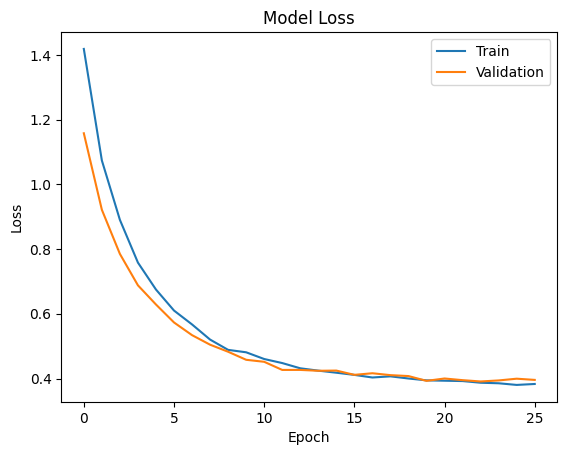

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

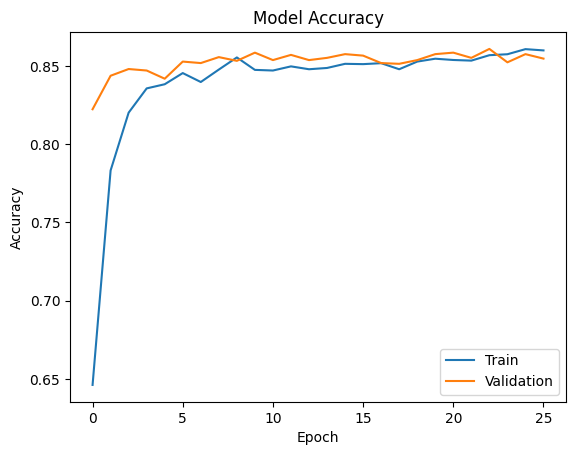

In [21]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')

In [22]:
y_pred=model.predict(X_test_scaled)

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [23]:
model.evaluate(X_test_scaled,y_test)

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8666 - loss: 0.3699


[0.3756445050239563, 0.8676666617393494]

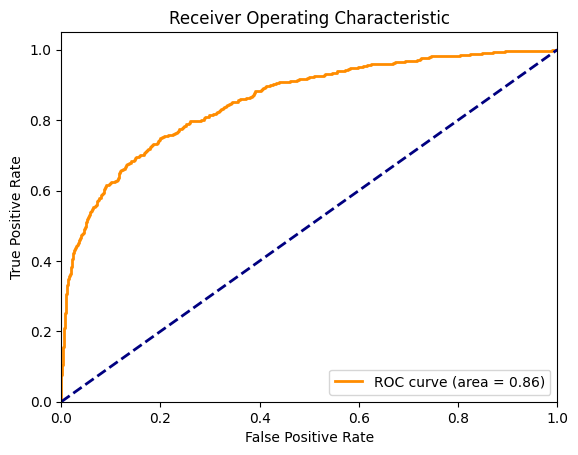

In [24]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt



# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [25]:
J = tpr - fpr
optimal_threshold_index = np.argmax(J)
optimal_threshold = thresholds[optimal_threshold_index]

In [42]:
distances = np.sqrt((1 - tpr)**2 + fpr**2)

# Find the index of the smallest distance
optimal_index = np.argmin(distances)

# Get the optimal threshold
optimal_threshold = thresholds[optimal_index]

# Print the optimal threshold
print("Optimal Threshold:", optimal_threshold)

Optimal Threshold: 0.16319853


In [26]:
print(f"Optimal Threshold: {optimal_threshold}")

Optimal Threshold: 0.16686907410621643


In [55]:
from sklearn.metrics import confusion_matrix
y_pred_binary = (y_pred >= 0.166).astype(int)
cm = confusion_matrix(y_test, y_pred_binary)

In [56]:
cm

array([[1932,  484],
       [ 147,  437]])

In [30]:
y_pred

array([[0.03512954],
       [0.01103481],
       [0.07960103],
       ...,
       [0.0211646 ],
       [0.00797998],
       [0.23343799]], dtype=float32)

In [57]:
y_pred1=np.where(y_pred>0.166, 1,0)

In [58]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred1)

0.7896666666666666

In [59]:
from sklearn.metrics import classification_report

# Assuming y_test is your true labels and y_pred is your predicted labels
report = classification_report(y_test, y_pred1)
print(report)


              precision    recall  f1-score   support

           0       0.93      0.80      0.86      2416
           1       0.47      0.75      0.58       584

    accuracy                           0.79      3000
   macro avg       0.70      0.77      0.72      3000
weighted avg       0.84      0.79      0.81      3000

